In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter
import os
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D


from kalman_utils_3D import *
from model_evaluation_3D import plot_residuals

from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from scipy.linalg import block_diag
from filterpy.stats import plot_covariance_ellipse
from filterpy.common import Saver

# Data Generation

In [2]:
traj = Trajectoy3DGenerattion(sigma=0.2)

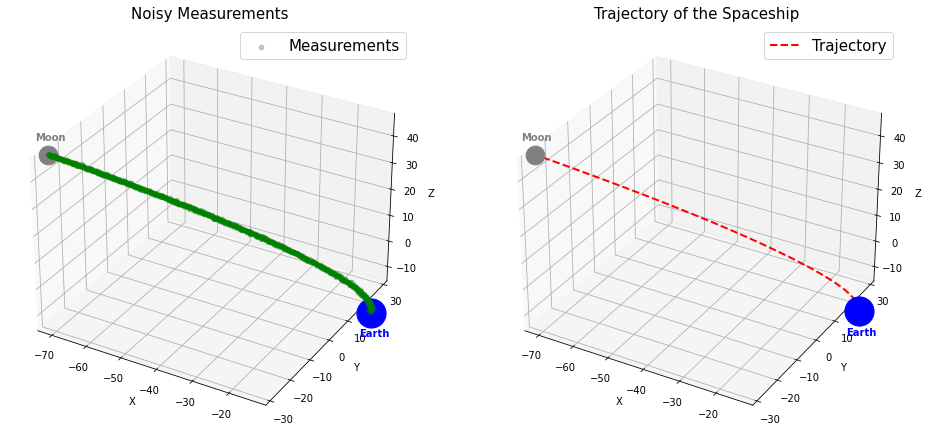

In [3]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(121, projection='3d')

plot_measurements_3D(traj, ax, title="Noisy Measurements")

ax2 = fig.add_subplot(122, projection='3d')

plot_trajectory_3D(traj, ax2, title="Trajectory of the Spaceship")
fig.savefig(os.path.join("Plots", "Measurements_Trajectory.png"))


In [4]:
#get filename to save the plots
def get_filename_from_ax(ax):
    title = ax.get_title().split(" ")
    s = ""
    for i,f in enumerate(title):
        if i <= len(title)-1 and i > 0:
            s+="_"+f
        else:
            s+=f
    if '-' in s:
        s = s.replace("-","_")
    if '=' in s:
        s = s.replace("=","_")
    return s

# Kalman Filtering

In [5]:
tracker = Ship_tracker(traj)
preds, cov = run(tracker, traj)

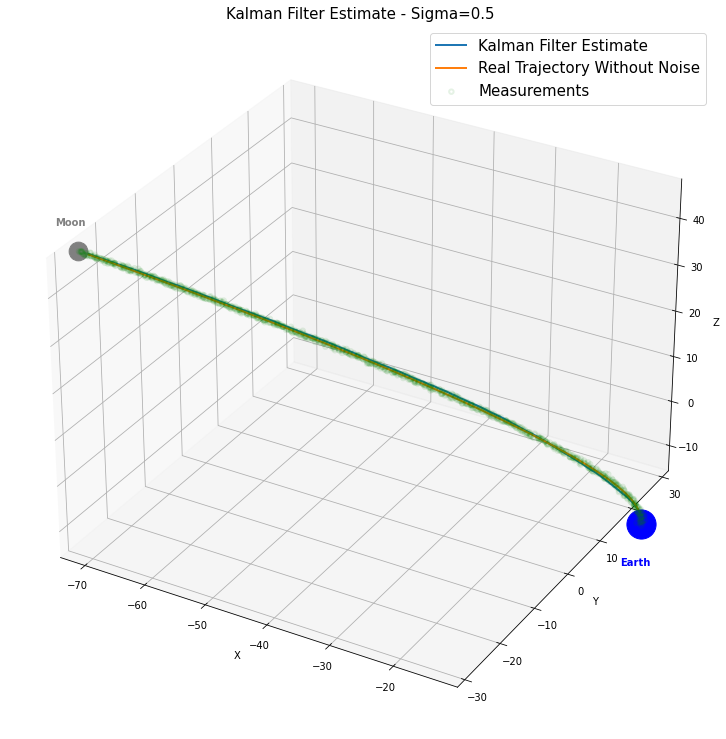

In [6]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds, traj, ax)
filename = get_filename_from_ax(ax)

fig.savefig(os.path.join("Plots", filename+".png"))


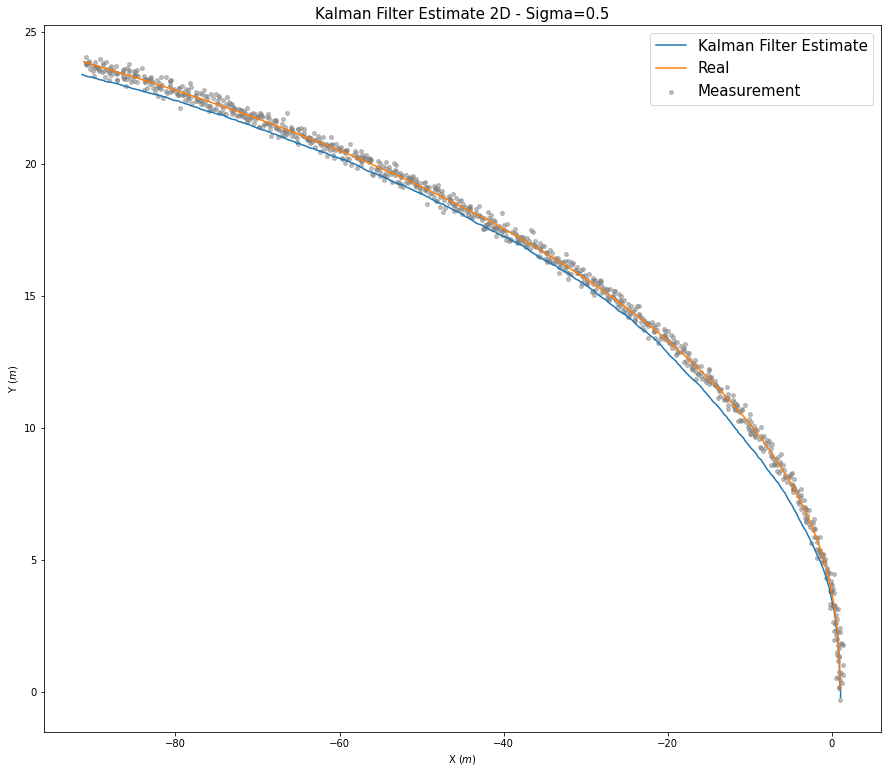

In [7]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
plot_x_z_2D(ax,traj, preds)

filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

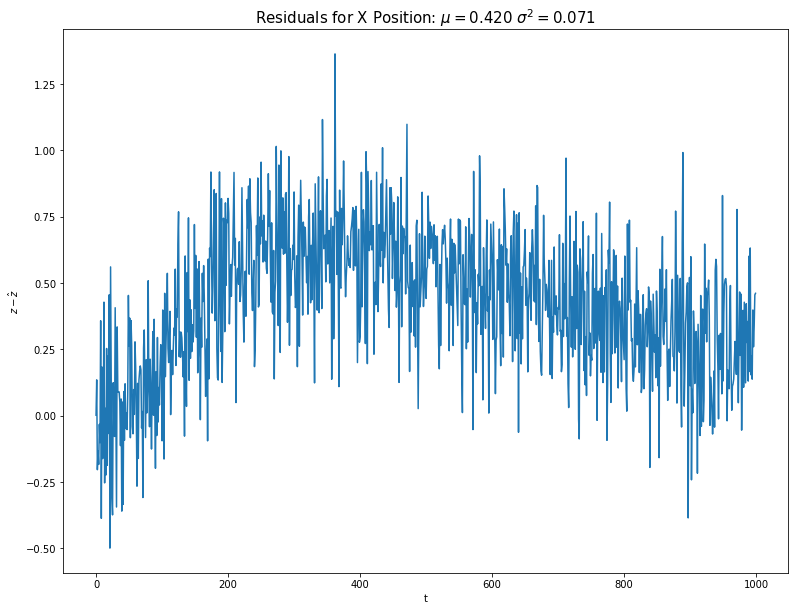

In [8]:
fig=plt.figure(figsize=(13,10))
plot_residuals(traj, 0, preds, "X Position")
fig.savefig(os.path.join("Plots", "x_residual.png"))

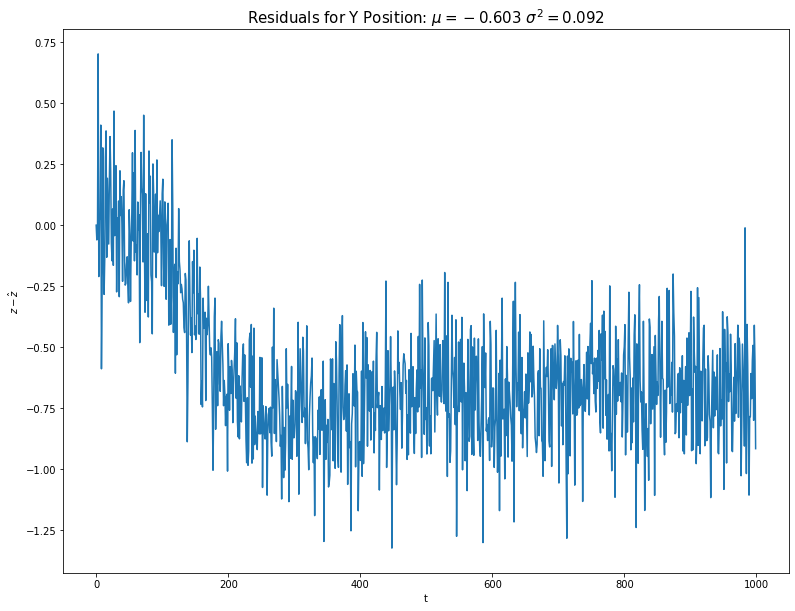

In [9]:
fig=plt.figure(figsize=(13,10))
plot_residuals(traj, 1,  preds, "Y Position")
fig.savefig(os.path.join("Plots", "y_residual.png"))

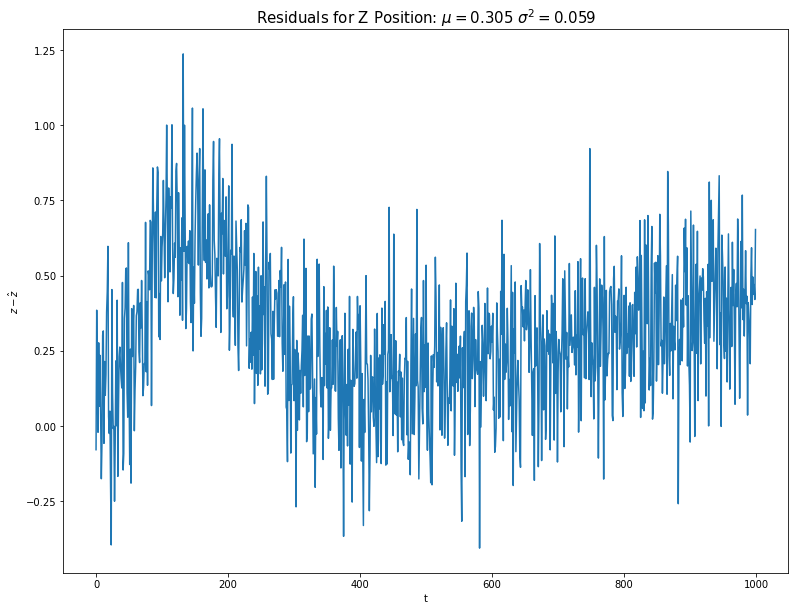

In [10]:
fig=plt.figure(figsize=(13,10))
plot_residuals(traj, 2,  preds, "Z Position")
fig.savefig(os.path.join("Plots", "z_residual.png"))

# Experiments : Signal Loss Simulation

## EX. 1 : The filter takes only the first half of the measurements

In [11]:
tracker_2 = Ship_tracker(traj)
preds_2, cov_2 = run_half_measures(tracker_2, traj)

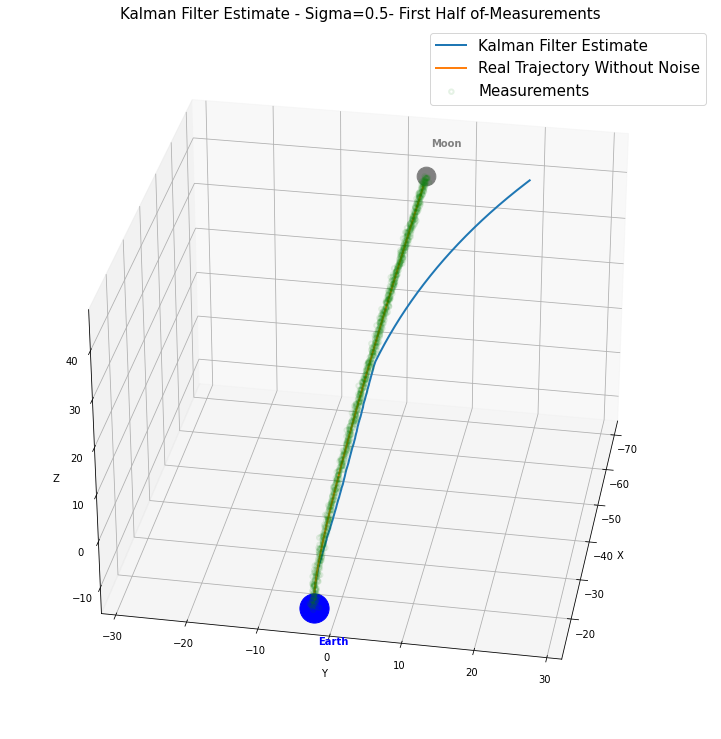

In [12]:
fig = plt.figure(figsize=(16,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds_2, traj, ax)
ax.set_title(ax.get_title()+"- First Half of-Measurements",fontsize=15)
ax.view_init(azim=10)
filename = get_filename_from_ax(ax)

fig.savefig(os.path.join("Plots", filename+".png"))

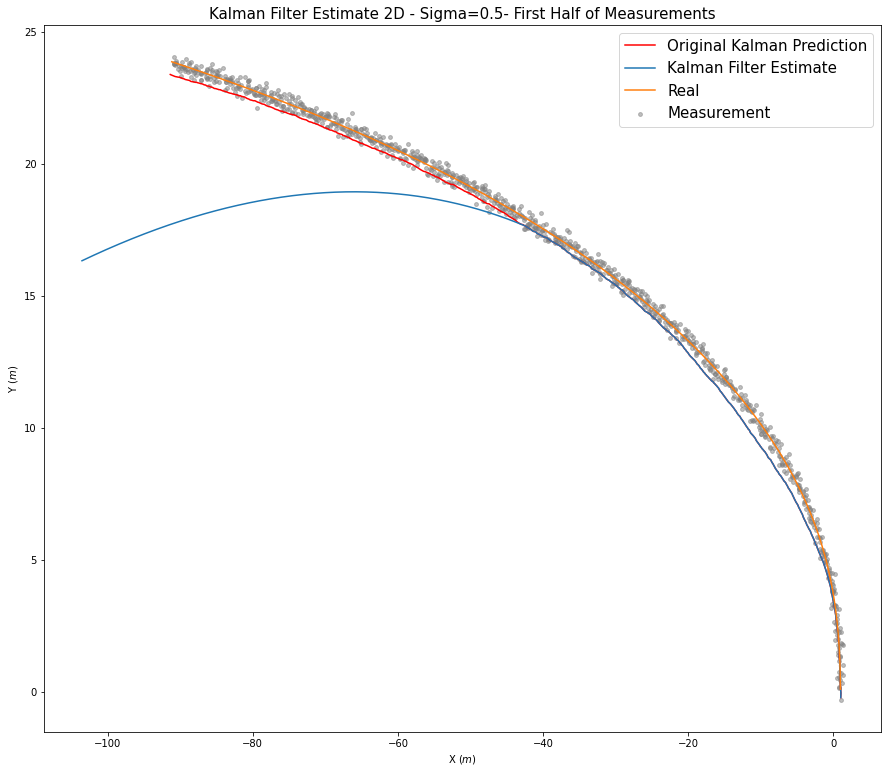

In [13]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
ax.plot(preds[:,0], preds[:,2], c='r', label = "Original Kalman Prediction")
plot_x_z_2D(ax,traj, preds_2)
ax.set_title(ax.get_title()+"- First Half of Measurements",fontsize=15)
filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

## EX. 2 : The filter takes only the even index of the measurements

In [14]:
tracker_3 = Ship_tracker(traj)
preds_3, cov_3 = run_even_index_update(tracker_3, traj)

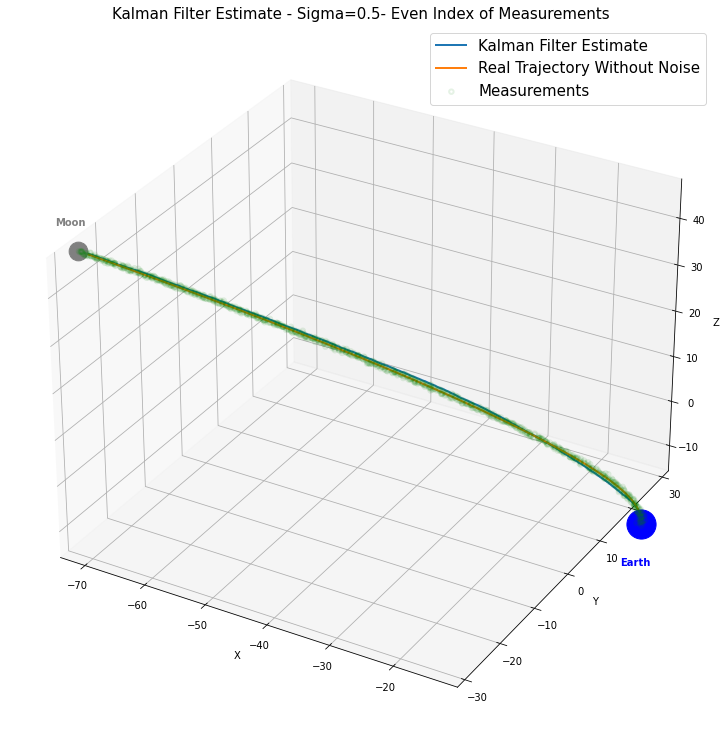

In [15]:
fig = plt.figure(figsize=(16,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds_3, traj, ax)
ax.set_title(ax.get_title()+"- Even Index of Measurements", fontsize=15)
#ax.view_init(azim=10)
filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

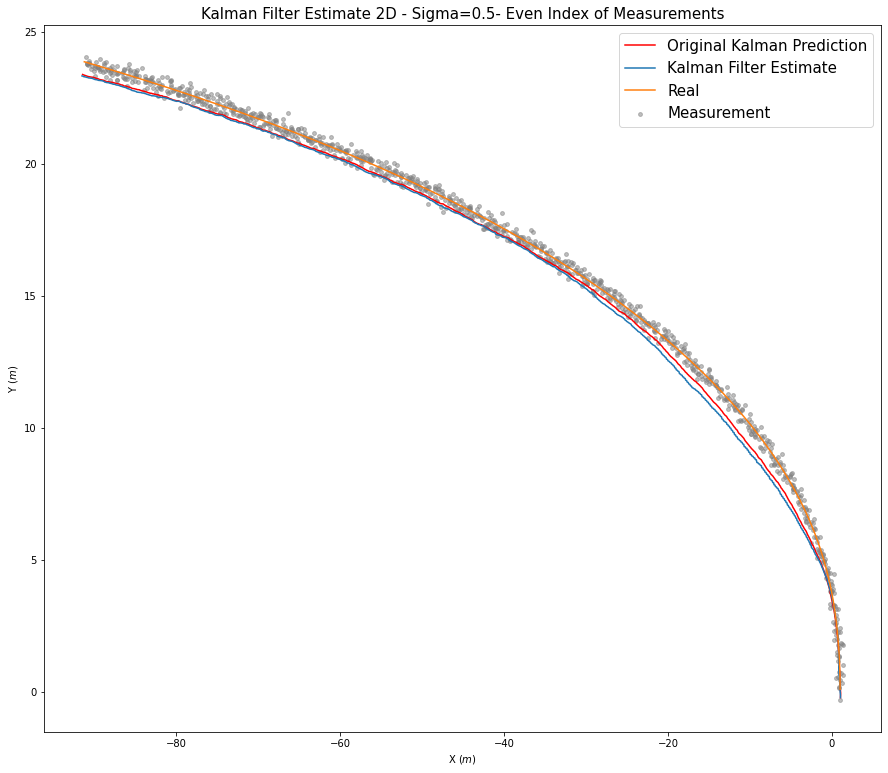

In [16]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
ax.plot(preds[:,0], preds[:,2], c='r', label = "Original Kalman Prediction")
plot_x_z_2D(ax,traj, preds_3)
ax.set_title(ax.get_title()+"- Even Index of Measurements",fontsize=15)

filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

## EX. 3 : The filter takes just a measurments every 5 

In [17]:
tracker_4 = Ship_tracker(traj)
preds_4, cov_4 = run_update_every_5(tracker_4, traj)

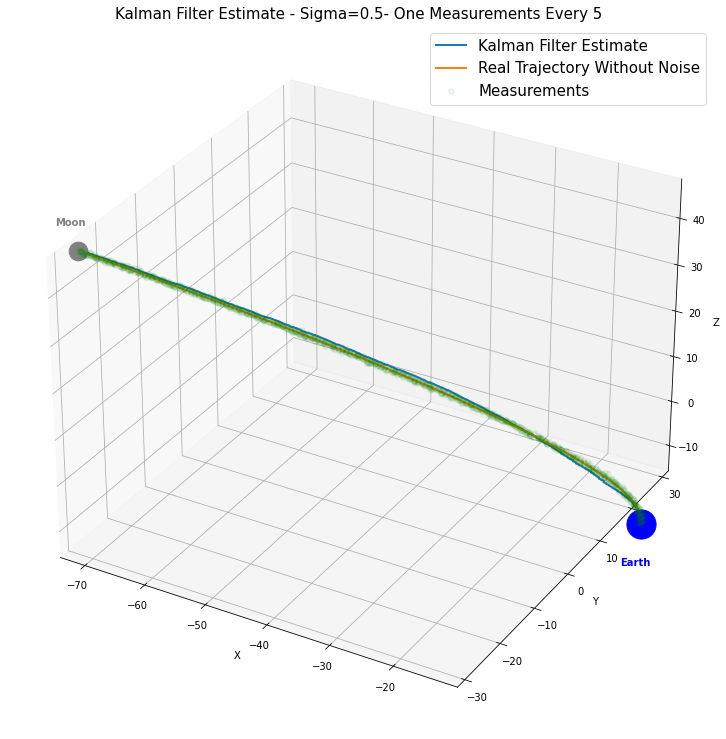

In [18]:
fig = plt.figure(figsize=(16,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds_4, traj, ax)
ax.set_title(ax.get_title()+"- One Measurements Every 5 ", fontsize=15)
#ax.view_init(azim=10)
filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

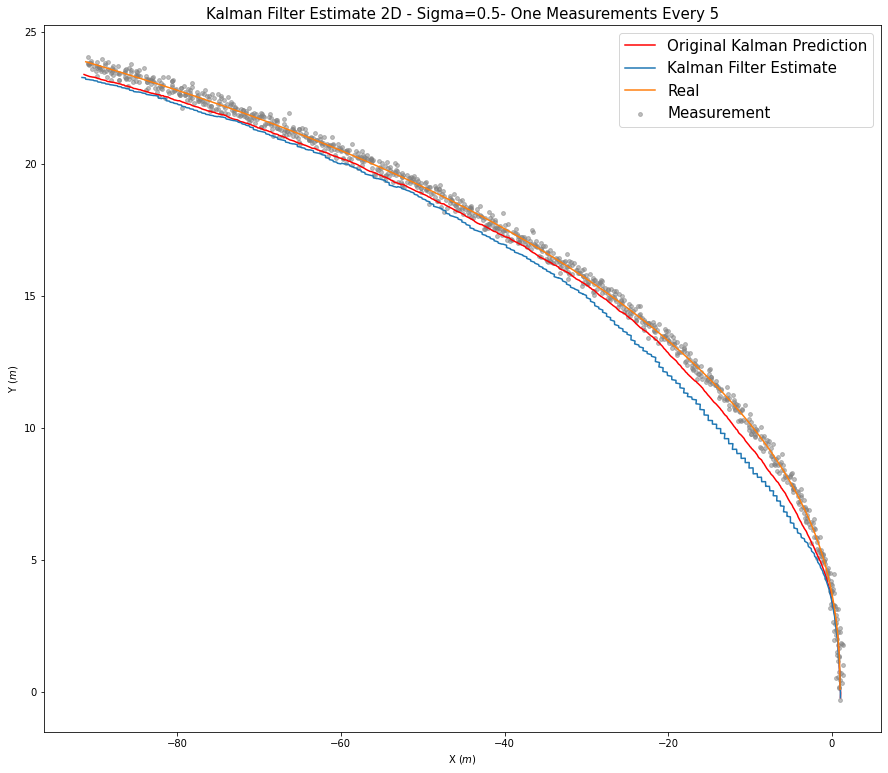

In [19]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
ax.plot(preds[:,0], preds[:,2], c='r', label = "Original Kalman Prediction")
plot_x_z_2D(ax,traj, preds_4)
ax.set_title(ax.get_title()+"- One Measurements Every 5",fontsize=15)

filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

## EX. 4 : The filter has missed measurement at half trip

In [20]:
tracker_5 = Ship_tracker(traj)
preds_5, cov_5 = run_update_hole_in_middle(tracker_5, traj)

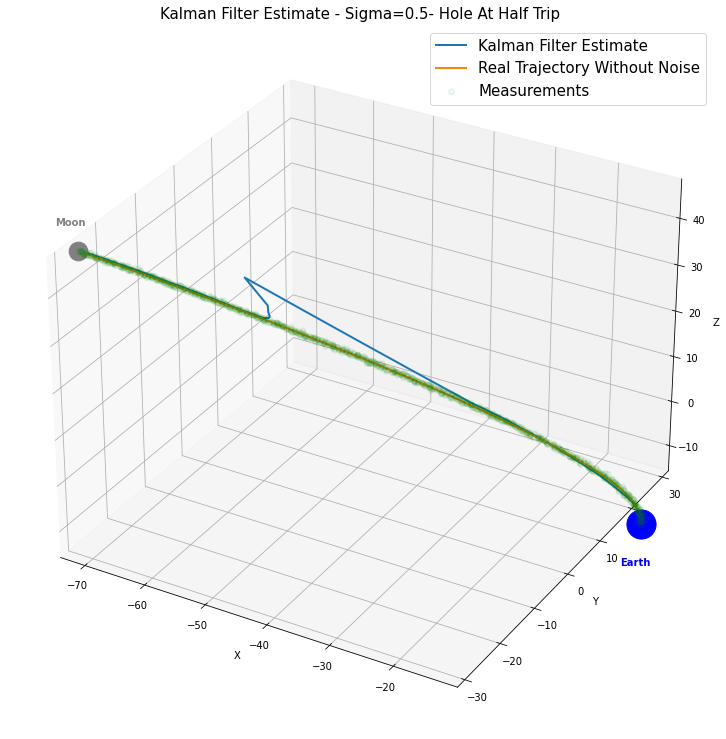

In [21]:
fig = plt.figure(figsize=(16,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds_5, traj, ax)
ax.set_title(ax.get_title()+"- Hole At Half Trip", fontsize=15)
#ax.view_init(azim=10)
filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

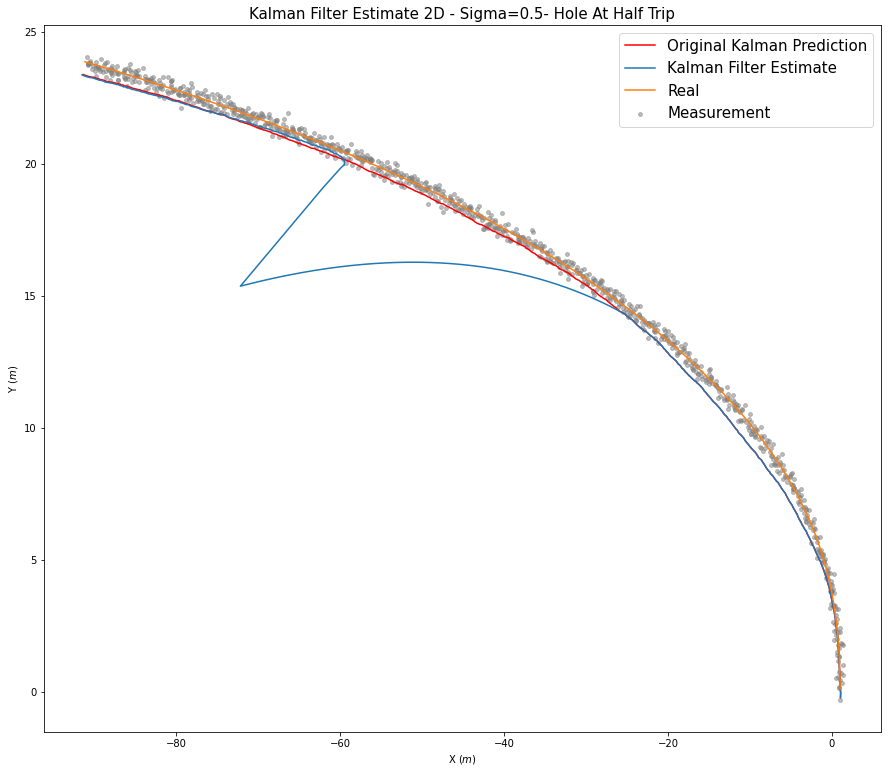

In [22]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
ax.plot(preds[:,0], preds[:,2], c='r', label = "Original Kalman Prediction")
plot_x_z_2D(ax,traj, preds_5)
ax.set_title(ax.get_title()+"- Hole At Half Trip",fontsize=15)

filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

# ANIMATION

anim = SpaceAnimation3D(preds, traj)
anim.save_and_visualize_animation("./Animations/animaion_3d_prediction.gif")

In [23]:
from filterpy.stats import NESS

Zx, Zy, Zz = traj.get_trajectory_position()
z = np.asarray([ Zx, Zy, Zz]).T

nees = NESS(z, preds[:, 0:3], cov[:, 0:3, 0:3])